In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

1. Загрузите данные по вариантам в ноутбук.


In [2]:
# Загружаем вариант, заголовками берем третью строку, первый столбец берем как индексы
table = pd.read_excel("Вариант 2.xlsx", header=2, index_col=0)
# Удаляем строку содержащую итоговые данные
table = table.drop(table.index[-1])
table


,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
№,,,,,,,,,,
1.0,124.0,11,Ж,341.0,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
2.0,128.0,11,Ж,345.0,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
3.0,132.0,11,Ж,340.0,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
4.0,134.0,11,Ж,339.0,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
5.0,136.0,11,Ж,348.0,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1.0,5.0,27.0
...,...,...,...,...,...,...,...,...,...,...
2352.0,136.0,11,М,337.0,++++++++++++,2(2)2(2)2(2)3(3)3(3)0(4)1(4),NaN,25.0,92.0,27.0
2353.0,136.0,11,М,341.0,++-+++++++++,2(2)2(2)1(2)2(3)2(3)4(4)1(4),NaN,25.0,92.0,27.0
2354.0,136.0,11,М,341.0,++++++++++++,2(2)1(2)2(2)1(3)3(3)4(4)2(4),NaN,27.0,96.0,27.0


In [8]:
from math import factorial
def C(n, k):
    return factorial(n)/factorial(k)/factorial(n-k)
sum([sum(C(t, i)*i/2**t for i in range(1, t+1)) for t in range(1, 7)])

10.5

In [19]:
import numpy as np
from random import randint
data = [np.random.randint(0, 2, randint(1, 6)).sum() for _ in range(1000000)]

In [21]:
np.array(data).mean()

1.751329

2. Сделайте описательную статистику полученных данных.


In [3]:
table.describe()


,№ школы,Номер варианта,Первичный балл,Балл,Минимальный балл
count,2356.000000,2356.000000,2356.000000,2356.000000,2356.0
mean,132.005518,338.273769,10.123939,49.255093,27.0
std,5.037984,53.660878,3.820484,17.880420,0.0
min,121.000000,101.000000,1.000000,5.000000,27.0
25%,127.000000,339.000000,7.000000,33.000000,27.0
50%,135.000000,342.500000,10.000000,50.000000,27.0
75%,136.000000,346.000000,13.000000,68.000000,27.0
max,137.000000,506.000000,27.000000,96.000000,27.0


3. Найдите процент учащихся, выполнивших работу ниже среднего.


In [4]:
# Для каждой строки указываем меньше ли балл чем средний, считаем количество True через сумму
le = (table["Балл"] < table["Балл"].mean()).sum()

# Переводим в проценты
f"{le / len(table):.3%}"

'48.005%'

4. Найти процент учащихся не сдавших экзамен.


In [5]:
# Находим стрки где балл меньше минимального
lose = (table["Балл"] < table["Минимальный балл"]).sum()

f"{lose / len(table):.3%}"

'9.211%'

5. Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен.


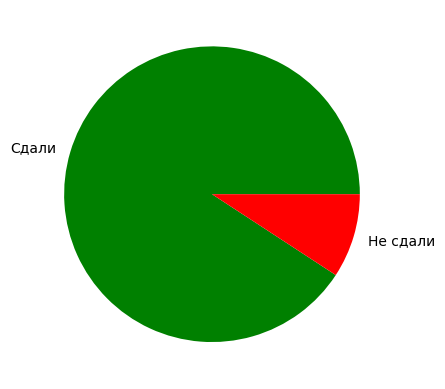

In [6]:
# Считаем количество не сдавших
failed = (table["Балл"] < table["Минимальный балл"]).sum()
# Считаем количество сдавших
passed = len(table) - failed
plt.pie(
    [passed, failed],
    labels=["Сдали", "Не сдали"],
    colors=["g", "r"],
)
None

6. Постройте ядерную оценку плотности распределению баллов за экзамен.


<Axes: ylabel='Density'>

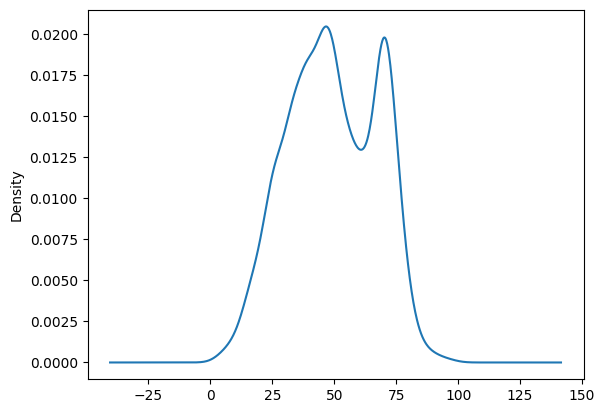

In [7]:
table["Балл"].plot.kde()

7. Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».


In [8]:
great = (table["Балл"] > 75).sum()
well = (table["Балл"] > 50).sum() - great
sat = (table["Балл"] > 25).sum() - great - well
unsat = len(table) - great - well - sat
good = np.array([great, well, sat, unsat]) / len(table)
print(
    "Отлично: {:.3%}\nХорошо: {:.3%}\nУдовлетворительно: {:.3%}\nНеудовлетворительно: {:.3%}\n".format(
        *good
    )
)

Отлично: 5.730%
Хорошо: 35.399%
Удовлетворительно: 49.660%
Неудовлетворительно: 9.211%



8. Какое процентное соотношение юношей и девушек писало данный экзамен?


In [9]:
male = (table["Пол"] == "М").sum()
female = (table["Пол"] == "Ж").sum()
print(f"Юноши: {male/len(table):.3%}\nДевушки: {female/len(table):.3%}")

Юноши: 47.156%
Девушки: 52.844%


9. Сколько школ принимало участие в экзамене?


In [10]:
# Берем уникальные значения из столбца с номрами школ и считаем их кол-во
len(table["№ школы"].unique())

17

10. Сколько всего заданий с кратким ответом? С развернутым ответом?


In [11]:
# short_ans_count = len(table['Задания с кратким ответом'].iloc[0])
long_ans = len(table['Задания с развёрнутым ответом'].iloc[0])//4
short_ans = len(table['Задания с кратким ответом'].iloc[0])
print(f"Задания с длинным ответом {long_ans}\nЗадания с коротким ответом {short_ans}")

Задания с длинным ответом 7
Задания с коротким ответом 12


11. Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: $В_1$, ... $В_к$ Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В.


In [12]:
typeB = pd.DataFrame([*table['Задания с кратким ответом'].map(list).values])
typeB

,0,1,2,3,4,5,6,7,8,9,10,11
0,-,-,-,-,-,-,+,-,-,-,-,-
1,-,+,-,-,-,-,-,-,-,-,-,-
2,-,+,-,-,-,-,-,-,-,-,-,-
3,-,+,-,-,-,-,-,-,-,-,-,-
4,-,-,-,-,-,-,-,-,+,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,+,+,+,+,+,+,+,+,+,+,+,+
2352,+,+,-,+,+,+,+,+,+,+,+,+
2353,+,+,+,+,+,+,+,+,+,+,+,+
2354,+,+,+,+,+,+,+,+,+,+,+,+


In [13]:
# Считаем процент выполненых (+ или 1)
(((typeB == "+") | (typeB == '1')).sum()/len(typeB)).map(lambda x: f"{x:.3%}")

0     89.261%
1     95.331%
2     92.784%
3     91.002%
4     88.497%
5     73.175%
6     37.479%
7     47.835%
8     91.851%
9     71.477%
10    59.253%
11    46.222%
dtype: object

12. Аналогично и с типом С (ответы с развернутым ответом)


In [14]:
# Берем все задания с развернутым ответом, и приводим к новому датафрейму
# Новый датасет содержит данные на сколько выполнено задание

def parse_C(value):
    a = np.array(list(map(int, value[::4])))
    t = np.array(list(map(int, value[2::4])))
    return a / t
typeC = pd.DataFrame([*table['Задания с развёрнутым ответом'].map(parse_C).values])
typeC

,0,1,2,3,4,5,6
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00
3,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00
...,...,...,...,...,...,...,...
2351,1.0,1.0,1.0,1.000000,1.000000,0.0,0.25
2352,1.0,1.0,0.5,0.666667,0.666667,1.0,0.25
2353,1.0,0.5,1.0,0.333333,1.000000,1.0,0.50
2354,1.0,1.0,1.0,0.000000,1.000000,1.0,0.50


In [15]:
# Вычисляем процентное соотношение и выводим в соответствующем виде
((typeC == 1).sum()/len(typeC)).map(lambda x: f"{x:.3%}")

0    26.146%
1     7.470%
2    12.564%
3     0.509%
4     1.104%
5     0.382%
6     0.042%
dtype: object

13. Сделайте анализ по двум школам:
    1. по всем выполненным заданиям типа В
    2. по заданиям типа С больше 50%
    3. по среднему баллу юношей и девушек


In [16]:
school1 = table[table['№ школы'] == table['№ школы'].unique()[0]]
school2 = table[table['№ школы'] == table['№ школы'].unique()[1]]

In [17]:
def mean_score(df):
    # Средний балл юношей и девушек
    male = df[df['Пол'] == 'М']['Балл'].mean()
    female = df[df['Пол'] == 'Ж']['Балл'].mean()
    return male, female

## Школа 1

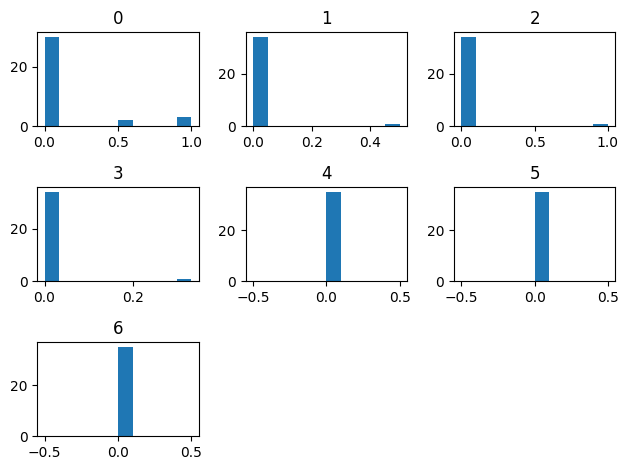

In [18]:
# Смотрим для школы гистограмму решенных C
typeC[(table['№ школы'] == table['№ школы'].unique()[0]).values].hist(grid=False)
plt.tight_layout()

<Axes: >

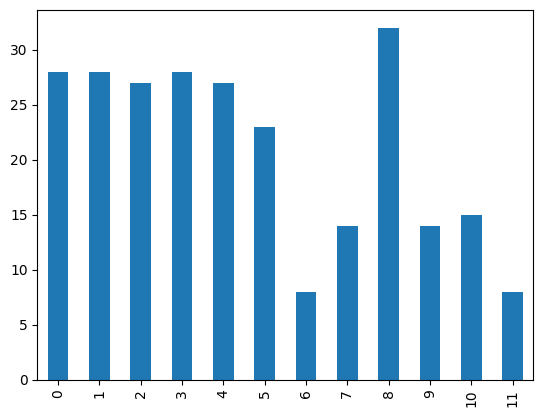

In [19]:
# Количество выполненых заданий B
data = typeB[(table['№ школы'] == table['№ школы'].unique()[0]).values]
((data == '+') | (data == '1')).sum().plot.bar()

In [20]:
# Средний балл среди юношей и девушек
print("Средний балл\nЮношей: {:.3f}\nДевушек: {:.3f}".format(*mean_score(school1)))

Средний балл
Юношей: 41.083
Девушек: 34.174


## Школа 1

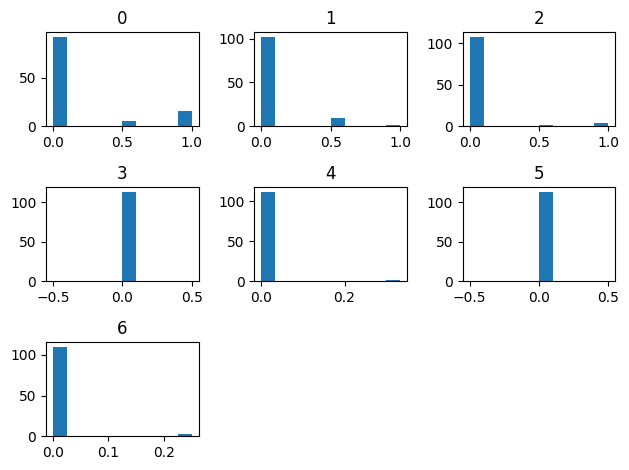

In [21]:
# Смотрим для школы гистограмму решенных C
typeC[(table['№ школы'] == table['№ школы'].unique()[1]).values].hist(grid=False)
plt.tight_layout()

<Axes: >

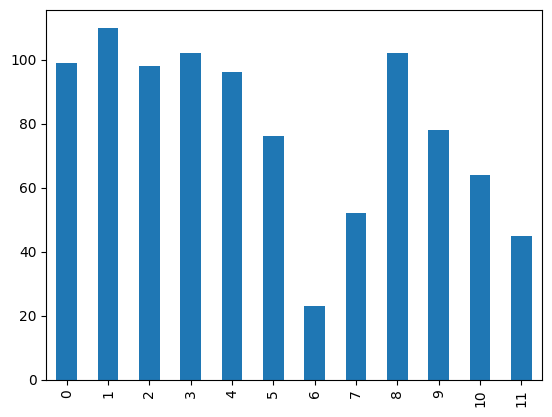

In [22]:
# Количество выполненых заданий B
data = typeB[(table['№ школы'] == table['№ школы'].unique()[1]).values]
((data == '+') | (data == '1')).sum().plot.bar()

In [23]:
# Средний балл среди юношей и девушек
print("Средний балл\nЮношей: {:.3f}\nДевушек: {:.3f}".format(*mean_score(school2)))

Средний балл
Юношей: 42.889
Девушек: 44.926
